<a href="https://colab.research.google.com/github/MainakRepositor/ML-Algorithms/blob/master/Spectral_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spectral Clustering

<hr>


## Spectral Clustering is a growing clustering algorithm which has performed better than many traditional clustering algorithms in many cases. It treats each data point as a graph-node and thus transforms the clustering problem into a graph-partitioning problem.

## 1. Importing necessary libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import SpectralClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score 
print("Necessary packages are included successfully!")

Necessary packages are included successfully!


## 2. Importing the dataset

In [3]:
# Changing the working location to the location of the data 
url = "/content/creditcard.csv"

# Loading the data 
X = pd.read_csv(url) 

# Handling the missing values if any 
X.fillna(method ='ffill', inplace = True) 

X.head() 


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


## 3. Preprocessing the data

In [4]:
# Preprocessing the data to make it visualizable 

# Scaling the Data 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 

# Normalizing the Data 
X_normalized = normalize(X_scaled) 

# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 

# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

X_principal.head() 


,P1,P2
0,0.752605,-0.155276
1,0.582875,0.214241
2,0.402981,-0.023604
3,0.402498,-0.183015
4,0.570848,0.131115


## 4. Building the ML model

In [5]:
# Building the clustering model 
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf') 

# Training the model and Storing the predicted cluster labels 
labels_rbf = spectral_model_rbf.fit_predict(X_principal) 


## 5. Visualization of the result

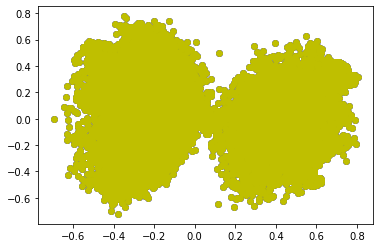

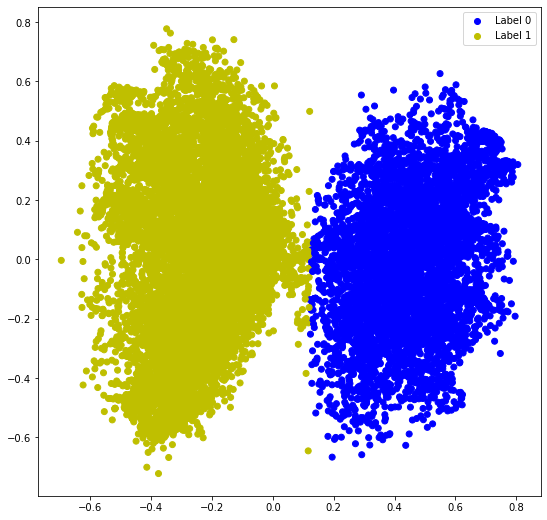

In [13]:
# Building the label to colour mapping 
colours = {} 
colours[0] = 'b'
colours[1] = 'y'

# Building the colour vector for each data point 
cvec = [colours[label] for label in labels_rbf] 

# Plotting the clustered scatter plot 

b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b'); 
y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y'); 


plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
plt.legend((b, y), ('Label 0', 'Label 1')) 
plt.show() 


## 6. Model Evaluation

In [7]:
# Building the clustering model 
spectral_model_nn = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors') 

# Training the model and Storing the predicted cluster labels 
labels_nn = spectral_model_nn.fit_predict(X_principal) 


In [8]:
# List of different values of affinity 
affinity = ['rbf', 'nearest-neighbours'] 

# List of Silhouette Scores 
s_scores = [] 

# Evaluating the performance 
s_scores.append(silhouette_score(X, labels_rbf)) 
s_scores.append(silhouette_score(X, labels_nn)) 

print(s_scores) 


[0.2643061276109799, 0.2596877927006646]


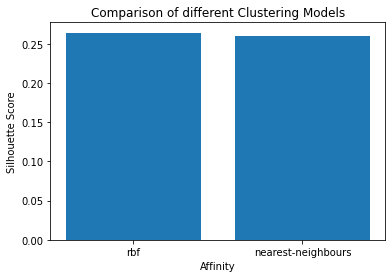

In [9]:
# Plotting a Bar Graph to compare the models 
plt.bar(affinity, s_scores) 
plt.xlabel('Affinity') 
plt.ylabel('Silhouette Score') 
plt.title('Comparison of different Clustering Models') 
plt.show() 
